# Example: Fit NHPP models

This notebook loads the bundled MUSA dataset and fits an exponential NHPP model.

In [1]:
# initialize
import importlib.resources as resources

import pandas as pd
import pysrat.nhpp as srm

In [3]:
data_path = resources.files("pysrat").joinpath("nhpp/datasets/musa/sys1g.csv")
df = pd.read_csv(data_path)

data = srm.NHPPData.from_counts(fault=df["fault"])

In [4]:
models = {
    "Exponential": srm.ExponentialNHPP(),
    "Gamma": srm.GammaNHPP(),
    "Pareto2": srm.Pareto2NHPP(),
    "TruncatedNormal": srm.TruncatedNormalNHPP(),
    "LogNormal": srm.LogNormalNHPP(),
    "TruncatedLogistic": srm.TruncatedLogisticNHPP(),
    "LogLogistic": srm.LogLogisticNHPP(),
    "TruncatedExtremeValueMax": srm.TruncatedExtremeValueMaxNHPP(),
    "LogExtremeValueMax": srm.LogExtremeValueMaxNHPP(),
    "TruncatedExtremeValueMin": srm.TruncatedExtremeValueMinNHPP(),
    "LogExtremeValueMin": srm.LogExtremeValueMinNHPP(),
}
for model in models.values():
    model.fit(data, verbose=True)

/Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
exp fit:   0%|          | 0/2000 [00:00<?, ?it/s]/Users/okamu/Documents/pysrat/src/pysrat/nhpp/_em.py:136: UserWarning: Did not converge to MLE by max iteration.
  warnings.warn("Did not converge to MLE by max iteration.")
tlogis fit:   0%|          | 0/2000 [00:00<?, ?it/s]               /Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


<Axes: xlabel='time', ylabel='# of faults'>

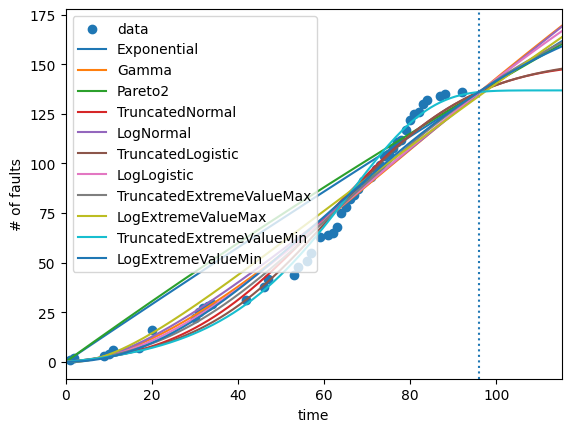

In [5]:
srm.plot_mvf(data, models)

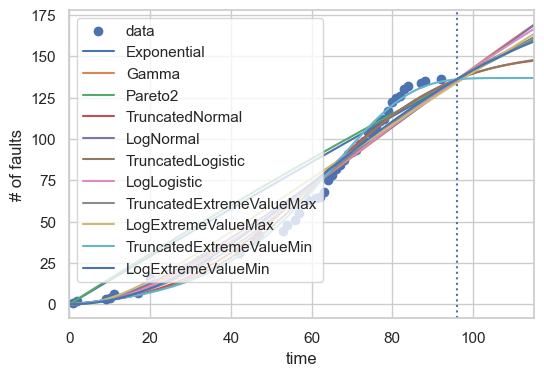

In [6]:
# seaborn example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
srm.plot_mvf(data, models, ax=ax)
plt.show()


<Axes: xlabel='time', ylabel='# of faults'>

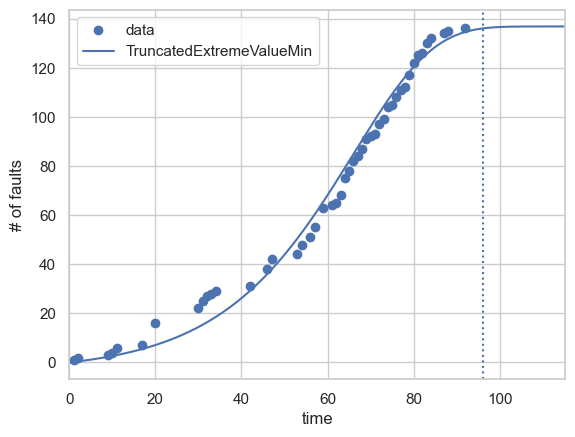

In [7]:
# select the best model by AIC with label
best_key = min(models, key=lambda k: models[k].aic_)
srm.plot_mvf(data, {best_key: models[best_key]})
